In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn.decomposition import PCA
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiments, outcomes = load_results("data/generated/genscen_Gorssel_50000_07-06-2021-05-33-45.tar.gz")
dike_model, planning_steps = get_model_for_problem_formulation("Overijssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]
x = experiments[uncertainties]

In [4]:
outcomes_df = pd.DataFrame(outcomes)

In [5]:
prim_algs = {}
for outcome in outcomes_df.columns:
    prim_algs[outcome] = prim.Prim(x, outcomes[outcome] > 0, threshold=0.8)
    print(outcome)

Difference in Expected Annual Damage Gorssel-Deventer
Expected Annual Damage Gorssel
Difference in Expected Number of Deaths Gorssel-Deventer


In [6]:
boxes = {}
for key in outcomes_df.columns:
    boxes[key] = prim_algs[key].find_box()

Difference in Expected Annual Damage Gorssel-Deventer


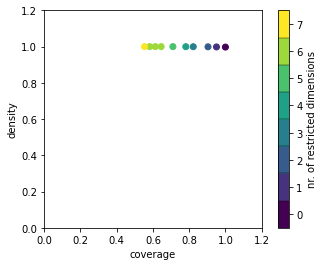

Expected Annual Damage Gorssel


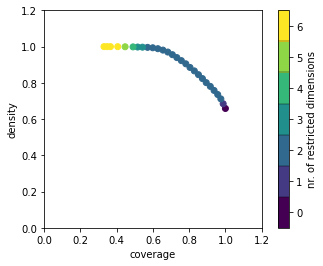

Difference in Expected Number of Deaths Gorssel-Deventer


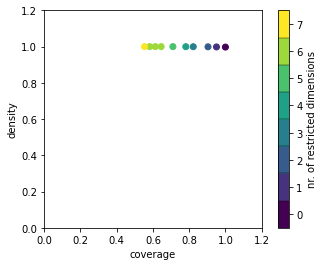

In [7]:
for key, box in boxes.items():
    print(key)
    box.show_tradeoff()
    plt.show()

In [8]:
box_id=20

coverage    0.542423
density     0.996875
id                20
mass         0.35836
mean        0.996875
res_dim            3
Name: 20, dtype: object

             box 20                                        
                min       max                     qp values
A.5_pfail  0.000006  0.733553                   [-1.0, 0.0]
A.4_pfail  0.487648  0.999985                   [0.0, -1.0]
A.2_pfail  0.049515  0.999991  [0.013079113787318847, -1.0]



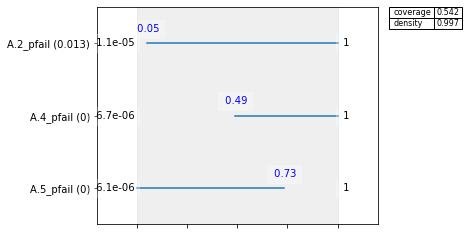

In [9]:
boxes["Expected Annual Damage Gorssel"].inspect(box_id)
boxes["Expected Annual Damage Gorssel"].inspect(box_id, style='graph')
plt.show()

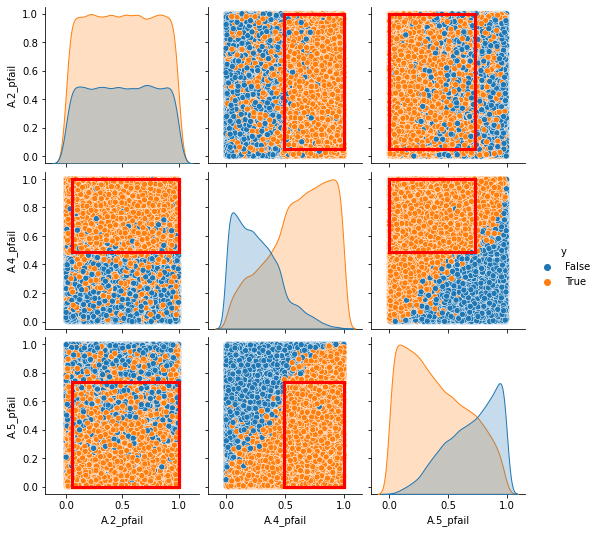

In [10]:
boxes["Expected Annual Damage Gorssel"].select(box_id)
boxes["Expected Annual Damage Gorssel"].show_pairs_scatter()

In [11]:
lims = boxes["Expected Annual Damage Gorssel"].box_lims[box_id]

In [12]:
# so now we just need to get scenarios that meet these ranges

In [13]:
conditions = []

for column in lims.columns:
    if isinstance(lims[column][0], set):
        conditions.append(experiments[column].isin(lims[column][0]))
    else:
        conditions.append(experiments[column] >= lims[column][0])
        conditions.append(experiments[column] <= lims[column][1])

df = pd.DataFrame(conditions).T

In [14]:
experiments.iloc[df[(df== False).any(axis=1)].index]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Policy 0,dikesnet
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet
5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49992,Policy 0,dikesnet
49993,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49993,Policy 0,dikesnet
49994,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49994,Policy 0,dikesnet
49997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49997,Policy 0,dikesnet
